In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [15]:
df = pd.read_csv(r"E:\ML Kamal Sir\Health_Insurance_Prediction\insurance.csv")
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
df.shape

(1338, 7)

In [19]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [20]:
df.info()
# Sex, smoker, region: this 3 column are categorical feature

# target col = "charges" & feature cols = "age, sex, bmi, children, smoker, region"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [21]:
# Data Analysis Starting
# statistical measurements
df.describe()
# min age = 18 & max = 64

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\a\AppData\Local\Temp\ipykernel_8024\3847697159.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


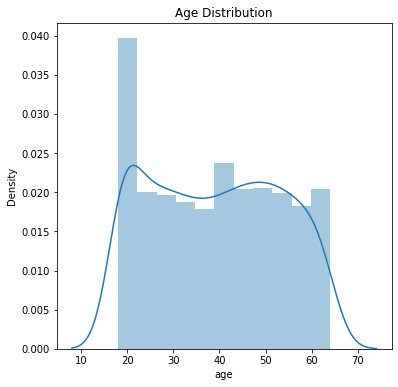

In [30]:
# distribution of age value
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title("Age Distribution")
plt.show()
# So below graph tell you that, more people are from age=20-22

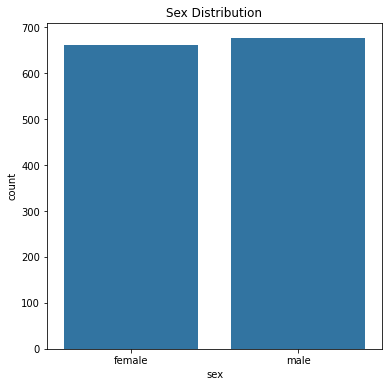

In [32]:
plt.figure(figsize=(6,6))
sns.countplot(data=df, x='sex')
plt.title("Sex Distribution")
plt.show()

In [38]:
df['sex'].value_counts()


male      676
female    662
Name: sex, dtype: int64

C:\Users\a\AppData\Local\Temp\ipykernel_8024\724505946.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


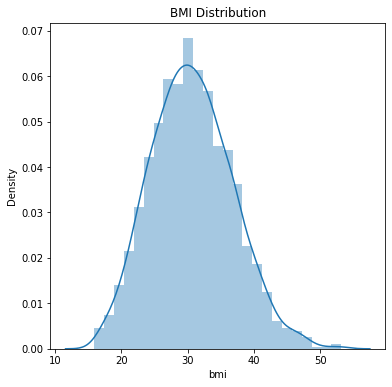

In [43]:
# BMI distribution

plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title("BMI Distribution")
plt.show()
# Normal BMI is between 18.5 to 24.9

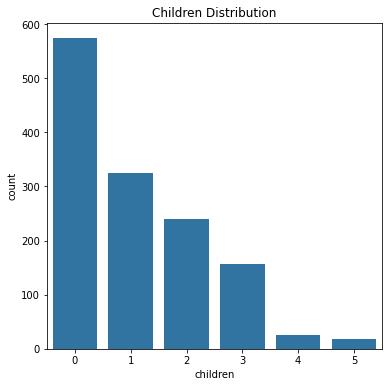

In [44]:
# children distribution

plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title("Children Distribution")
plt.show()
# from below graph, we can say that, most people (550) doesn't have children & around 300 people have 1 child

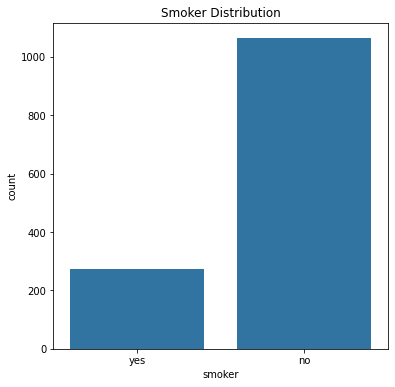

In [45]:
# Smoker distribution

plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title("Smoker Distribution")
plt.show()

In [47]:
df['smoker'].value_counts()
# So from above graph, we can say that- there are more non-smoker than smoker

no     1064
yes     274
Name: smoker, dtype: int64

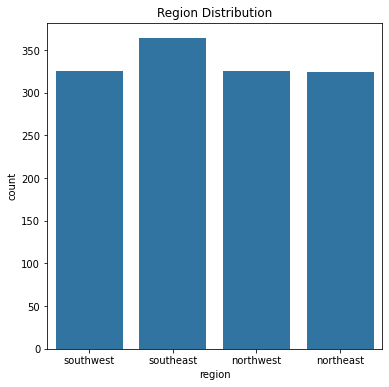

In [48]:
# region Distribution

plt.figure(figsize=(6,6))
sns.countplot(data=df, x='region')
plt.title("Region Distribution")
plt.show()

In [49]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\a\AppData\Local\Temp\ipykernel_8024\2259264630.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


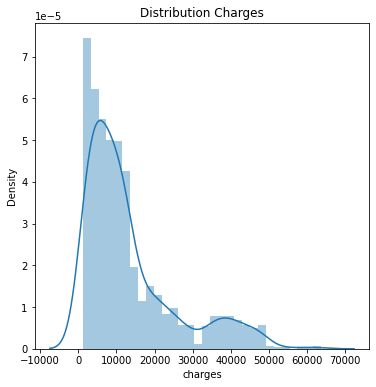

In [50]:
# charges distibution

plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title("Distribution Charges")
plt.show()

In [62]:
# Data Preprocessing
# So we can't provide the categorical data "string" data to our machine: Machine only knows Numerical data
# to change sex, smoker, region we will be doing ---  encoding
df['sex'].replace({'male':1, 'female':0},inplace=True)


In [63]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [64]:
# yes = 0, no = 1
df['smoker'].replace({'yes':0, 'no':1}, inplace=True)

In [66]:
# southe = 0, sow = 1, noe = 2, now = 3

df['region'].replace({'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}, inplace=True)

In [69]:
# Spliting the features & target column

x = df.drop(columns={'charges'}, axis=1)
y = df['charges']

In [72]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,0,1
1,18,1,33.770,1,1,0
2,28,1,33.000,3,1,0
3,33,1,22.705,0,1,3
4,32,1,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,1,3
1334,18,0,31.920,0,1,2
1335,18,0,36.850,0,1,0
1336,21,0,25.800,0,1,1


In [77]:
# Splitting data in label & target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


In [78]:
print(x.shape, x_train.shape, x_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [79]:
# model training

# linear regression model

regressor = LinearRegression()

In [80]:
regressor.fit(x_train, y_train)

LinearRegression()

In [82]:
# prediction on training data

train_data_prediction = regressor.predict(x_train)

In [83]:
r2_train = metrics.r2_score(y_train, train_data_prediction)
print("score = ",r2_train)

score =  0.751505643411174


In [84]:
# prediction on testing data

test_data_prediction = regressor.predict(x_test)

In [85]:
r2_test = metrics.r2_score(y_test, test_data_prediction)
print("test score = ",r2_test)

test score =  0.7447273869684077


In [92]:
# predicting system
input_data = (19,0,27.9,0,0,1)

# change input_data to numpy array
input_data_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshape = input_data_numpy_array.reshape(1,-1)

# finally find prediction of charges

prediction = regressor.predict(input_data_reshape)
print("pred = ",prediction)

pred =  [25597.73941347]


C:\Users\a\miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
